In [1]:
# DataVisualization
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Stats
import scipy as sp
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
# 表示桁数の指定
%precision 3

'%.3f'

In [2]:
# サンプルデータの作成
weather = [
    "cloudy","cloudy",
    "rainy","rainy",
    "sunny","sunny"
]

beer = [6,8,2,4,10,12]

weather_beer = pd.DataFrame({
        "beer" : beer,
        "weather" : weather
})

In [4]:
weather_beer

,beer,weather
0,6,cloudy
1,8,cloudy
2,2,rainy
3,4,rainy
4,10,sunny
5,12,sunny


/Users/Takanori/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


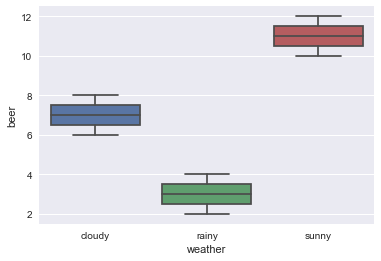

In [5]:
# 箱ひげ図
sns.boxplot(x = "weather", y = "beer", data = weather_beer)

In [8]:
weather_beer.groupby("weather").mean()

,beer
weather,
cloudy,7
rainy,3
sunny,11


### 分散分析➀群間・郡内平方和の計算

#### 一元配置分散分析の実装

In [9]:
# 天気の持つ影響
# 効果
effect = [7,7,3,3,11,11]

In [11]:
# 天気の平均値
mu_effect = sp.mean(effect)
mu_effect

7.000

In [12]:
# 群間の平方和
# 各温度の平均値から天気の平均値を引いている
squares_model = sp.sum((effect - mu_effect) ** 2)
squares_model

64.000

In [13]:
# ビールの売上から平均値をマイナス
resid = weather_beer.beer - effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [16]:
# 郡内の平方和
squares_resid = sp.sum(resid ** 2)
squares_resid

6

### 分散分析➁群間・郡内分析の計算

群間・郡内の分散を計算する際に、分母は自由度となる。<br>

群間変動の自由度「（曇り、雨、晴れ） - 1」<br>
群内変動の自由度「サンプルサイズ - 水準の種類数」<br>

In [17]:
df_model = 2
df_resid = 3

In [19]:
# 群間の平均平方（分散）
variance_model = squares_model / df_model
variance_model

32.000

In [20]:
# 郡内の平均平方(分散)
variance_resid = squares_resid / df_resid
variance_resid

2.000

### F比・p値の計算

In [22]:
f_ratio = variance_model / variance_resid
f_ratio

16.000

p値はF分布の累積分布関数から計算可能<br>

In [23]:
1 - sp.stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)

0.025

以上から天気によって売上は有意に変化することがわかる。<br>

### 一元配置分散分析の計算を簡単にまとめる

データを「効果の大きさ」と「誤差の大きさ」に分離。<br>
そして、各々の大きさを分散として定量化。<br>
前者を群間変動、後者を郡内変動という。<br>

以下のurlを読む<br>
http://daas.la.coocan.jp/GLM/hosoku_2_anova.htm